In [ ]:
# Introduction
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load your dataset
df = pd.read_csv("HollywoodMovies.csv")

In [6]:
df.head()

,Movie,LeadStudio,RottenTomatoes,AudienceScore,Story,Genre,TheatersOpenWeek,OpeningWeekend,BOAvgOpenWeekend,DomesticGross,ForeignGross,WorldGross,Budget,Profitability,OpenProfit,Year
0,Spider-Man 3,Sony,61.0,54.0,Metamorphosis,Action,4252.0,151.1,35540.0,336.53,554.34,890.87,258.0,345.30,58.57,2007
1,Shrek the Third,Paramount,42.0,57.0,Quest,Animation,4122.0,121.6,29507.0,322.72,476.24,798.96,160.0,499.35,76.00,2007
2,Transformers,Paramount,57.0,89.0,Monster Force,Action,4011.0,70.5,17577.0,319.25,390.46,709.71,150.0,473.14,47.00,2007
3,Pirates of the Caribbean: At World's End,Disney,45.0,74.0,Rescue,Action,4362.0,114.7,26302.0,309.42,654.00,963.42,300.0,321.14,38.23,2007
4,Harry Potter and the Order of the Phoenix,Warner Bros,78.0,82.0,Quest,Adventure,4285.0,77.1,17998.0,292.00,647.88,939.89,150.0,626.59,51.40,2007


In [7]:
#shape of dataset
df.shape

(970, 16)

In [8]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie             970 non-null    object 
 1   LeadStudio        961 non-null    object 
 2   RottenTomatoes    913 non-null    float64
 3   AudienceScore     907 non-null    float64
 4   Story             641 non-null    object 
 5   Genre             691 non-null    object 
 6   TheatersOpenWeek  949 non-null    float64
 7   OpeningWeekend    969 non-null    float64
 8   BOAvgOpenWeekend  945 non-null    float64
 9   DomesticGross     970 non-null    float64
 10  ForeignGross      876 non-null    float64
 11  WorldGross        914 non-null    float64
 12  Budget            897 non-null    float64
 13  Profitability     896 non-null    float64
 14  OpenProfit        895 non-null    float64
 15  Year              970 non-null    int64  
dtypes: float64(11), int64(1), object(4)
memory u

In [9]:
# Fill missing story values
df['Story'] = df['Story'].fillna('')

In [10]:
# TF-IDF Vectorization on 'Story' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Story'])

In [11]:
# Cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [12]:
cosine_sim 

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [13]:
# Recommendation function
def recommend(movie_title):
    if movie_title not in df['Movie'].values:
        return "Movie not found in dataset."
    idx = df[df['Movie'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:6]]
    return df['Movie'].iloc[top_indices].tolist()

In [14]:
# Example usage
print(recommend("Avatar"))

['Iron Man', 'The Incredible Hulk', 'Avatar', 'District 9', 'The Princess and the Frog']


In [15]:
print(df.columns)

Index(['Movie', 'LeadStudio', 'RottenTomatoes', 'AudienceScore', 'Story',
       'Genre', 'TheatersOpenWeek', 'OpeningWeekend', 'BOAvgOpenWeekend',
       'DomesticGross', 'ForeignGross', 'WorldGross', 'Budget',
       'Profitability', 'OpenProfit', 'Year'],
      dtype='object')


In [16]:
# Drop duplicates if any
df.drop_duplicates(subset='Movie', inplace=True)

In [17]:
# Optional: Clean genre column
df['Genre'] = df['Genre'].fillna('Unknown')

In [20]:
df["Genre"]

0         Action
1      Animation
2         Action
3         Action
4      Adventure
         ...    
964      Unknown
965      Unknown
967      Unknown
968      Unknown
969    Biography
Name: Genre, Length: 968, dtype: object

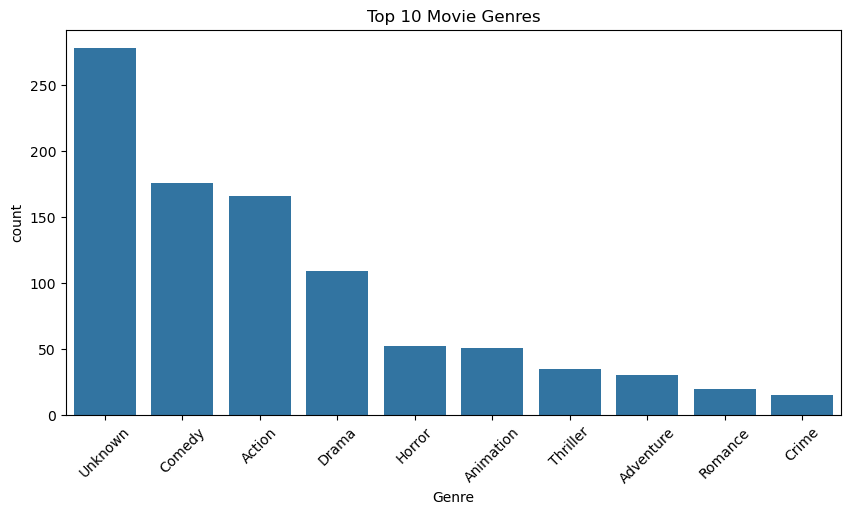

In [21]:
# Visualizations
# Top genres
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index[:10])
plt.title("Top 10 Movie Genres")
plt.xticks(rotation=45)
plt.show()


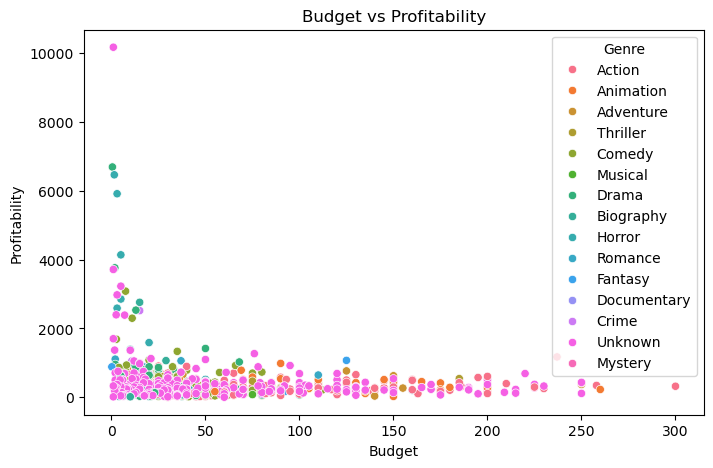

In [22]:
# Profitability vs Budget
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Budget', y='Profitability', hue='Genre')
plt.title("Budget vs Profitability")
plt.show()

In [27]:
# Filter movies by genre and recommend based on story
def recommend_by_genre(movie_title, genre_filter):
    # Step 1: Filter movies by genre
    genre_movies = df[df['Genre'].str.contains(genre_filter, case=False)].reset_index(drop=True)

    # Step 2: Check if the movie exists in filtered genre
    if movie_title not in genre_movies['Movie'].values:
        return "Movie not found in selected genre."

    # Step 3: TF-IDF vectorization on 'Story'
    tfidf = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf.fit_transform(genre_movies['Story'])

    # Step 4: Cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)

    # Step 5: Get index of the movie in filtered dataframe
    movie_index = genre_movies[genre_movies['Movie'] == movie_title].index[0]

    # Step 6: Get top 5 similar movies
    sim_scores = list(enumerate(cosine_sim[movie_index]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    top_indices = [i[0] for i in sim_scores[1:6]]

    # Step 7: Return recommended movies
    return genre_movies[['Movie', 'Genre']].iloc[top_indices]

In [28]:
# Example
print(recommend_by_genre("Avatar", "Action"))

                                  Movie   Genre
20                             Iron Man  Action
25                  The Incredible Hulk  Action
51                               Avatar  Action
64                           District 9  Action
127  Captain America: The First Avenger  Action


C:\Users\Kavita\AppData\Local\Temp\ipykernel_30748\1020754754.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=studio_counts.index, y=studio_counts.values, palette='mako', legend=False)


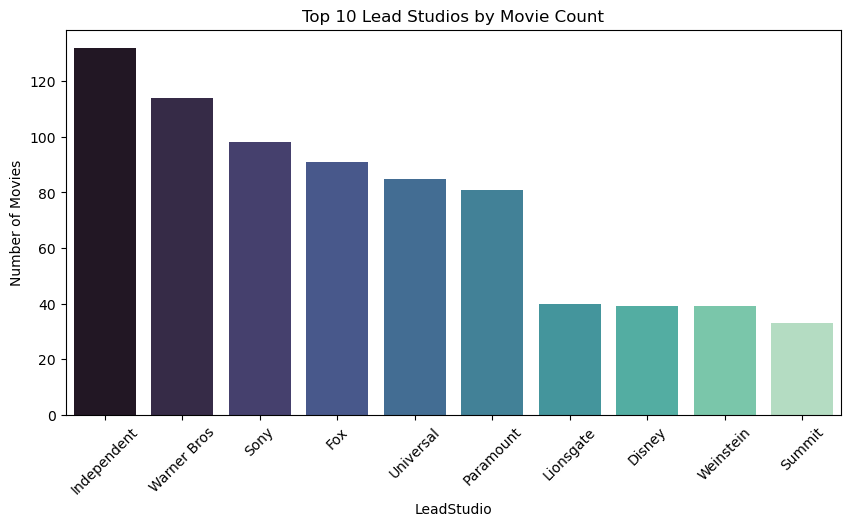

In [34]:
#Studios by Movie Count
studio_counts = df['LeadStudio'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=studio_counts.index, y=studio_counts.values, palette='mako', legend=False)
plt.title("Top 10 Lead Studios by Movie Count")
plt.xticks(rotation=45)
plt.ylabel("Number of Movies")
plt.show()

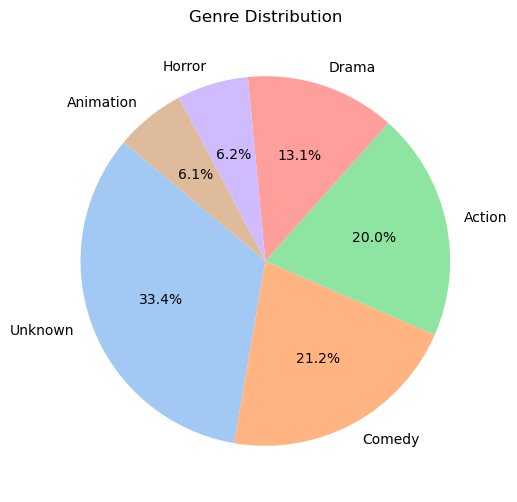

In [35]:
#Genre Distribution Pie Chart
genre_counts = df['Genre'].value_counts().head(6)
plt.figure(figsize=(6,6))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Genre Distribution")
plt.show()

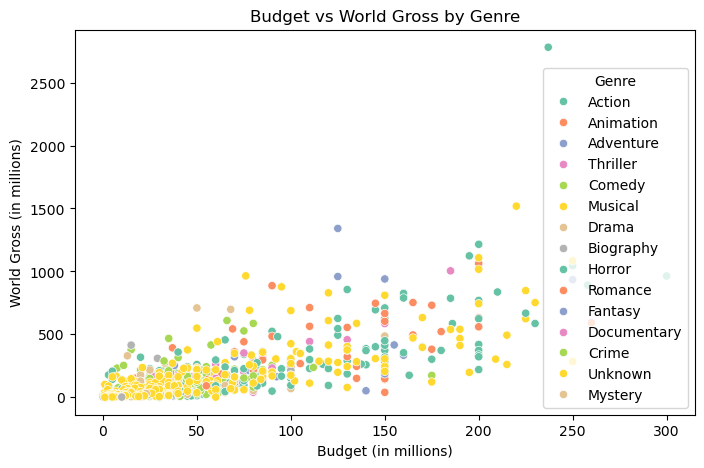

In [36]:
#Budget vs WorldGross Scatter Plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Budget', y='WorldGross', hue='Genre', palette='Set2')
plt.title("Budget vs World Gross by Genre")
plt.xlabel("Budget (in millions)")
plt.ylabel("World Gross (in millions)")
plt.show()

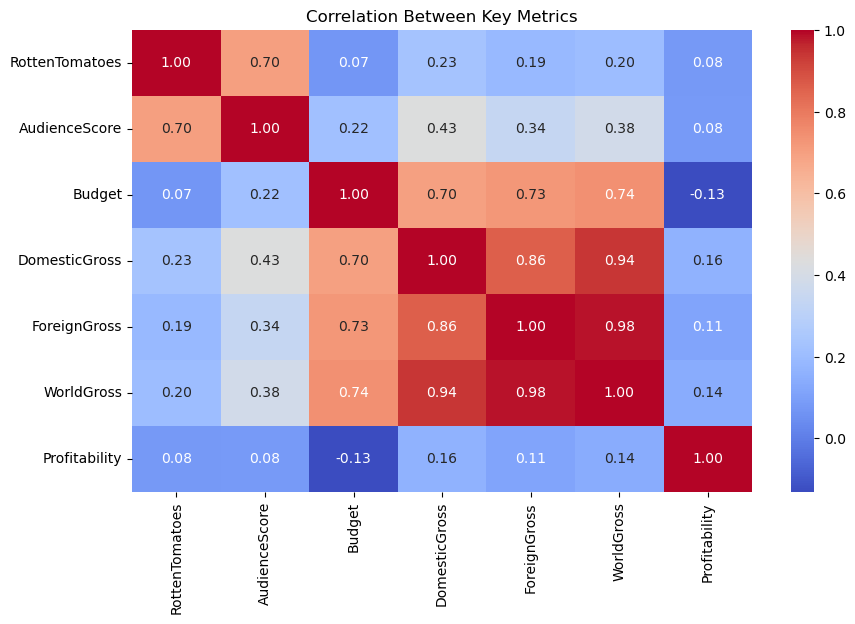

In [37]:
#Correlation Heatmap of Numeric Column
numeric_cols = ['RottenTomatoes', 'AudienceScore', 'Budget', 'DomesticGross', 'ForeignGross', 'WorldGross', 'Profitability']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Key Metrics")
plt.show()

In [39]:
# Table of Top 5 Most Profitable Movies
top_profit = df.sort_values(by='Profitability', ascending=False)[['Movie', 'Genre', 'Budget', 'WorldGross', 'Profitability']].head(5)
print(top_profit)

                     Movie    Genre  Budget  WorldGross  Profitability
779       The Devil Inside  Unknown     1.0     101.760       10175.85
172              Fireproof    Drama     0.5      33.470        6694.40
562              Insidious   Horror     1.5      97.010        6467.27
445  Paranormal Activity 2   Horror     3.0     177.511        5917.03
584  Paranormal Activity 3   Horror     5.0     207.040        4140.78
